In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('bodyfat.csv')
df.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


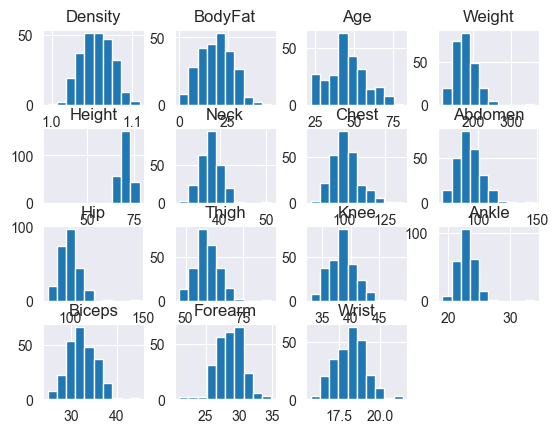

In [3]:
df.hist()
plt.title("Rozkład BodyFat")
plt.show()

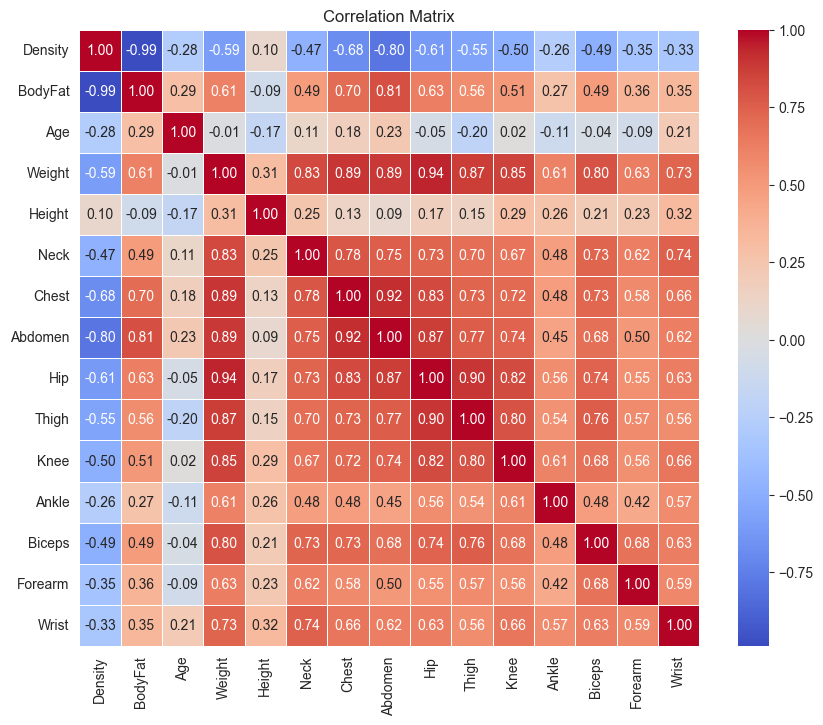

In [4]:
correlationMatrix = df.corr()
plt.figure(figsize=(10, 8))
plt.title("Correlation Matrix")
sns.heatmap(correlationMatrix, annot = True, cmap = 'coolwarm', linewidths=0.5, fmt = '.2f')
plt.show()

In [5]:
def Test_Train_Split(df, test_ratio, last_column):
    df_shuffled = df.sample(frac=1, random_state=1).reset_index(drop=True)
    test_size = int(len(df_shuffled) * test_ratio)
    test_set = df_shuffled[:test_size]
    train_set = df_shuffled[test_size:]

    X_train = train_set.drop(columns=[last_column])
    y_train = train_set[last_column]
    X_train = X_train.reset_index(drop=True)
    y_train = y_train.reset_index(drop=True)

    X_test = test_set.drop(columns=[last_column])
    y_test = test_set[last_column]

    return X_train, y_train, X_test, y_test

In [6]:
df=df.drop(columns=['Density'])
X_train, y_train, X_test, y_test = Test_Train_Split(df, test_ratio=0.2, last_column='BodyFat')

In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Age      202 non-null    int64  
 1   Weight   202 non-null    float64
 2   Height   202 non-null    float64
 3   Neck     202 non-null    float64
 4   Chest    202 non-null    float64
 5   Abdomen  202 non-null    float64
 6   Hip      202 non-null    float64
 7   Thigh    202 non-null    float64
 8   Knee     202 non-null    float64
 9   Ankle    202 non-null    float64
 10  Biceps   202 non-null    float64
 11  Forearm  202 non-null    float64
 12  Wrist    202 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 20.6 KB


In [8]:
#sns.pairplot(df[list(df.columns)], hue='BodyFat')

In [9]:
class KNN:
    def __init__(self, k, T_x, T_y):
        self.k = k
        self.trainSetX = T_x
        self.trainSetY = T_y
    def classify(self, vector):
        odleglosci = []
        for i in range(len(self.trainSetX)):
            odleglosci.append([self.distance(vector, self.trainSetX.iloc[i]), i])
        odleglosci.sort()
        res = 0

        for i in range(self.k):
            key = odleglosci[i][1]
            res += self.trainSetY.iloc[key]
        return res / self.k


    def distance(self, v1, v2):
        suma = 0
        for i in range(len(v1)):
            suma += (v1.iloc[i] - v2.iloc[i]) ** 2
        return np.sqrt(suma)

In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Wynik dla danych bez normalizacji


In [11]:
def NumberOfNeighbors(X_train, y_train, X_test, y_test, k_max):
    best_r2=0
    nb_of_neighbors = 0
    for k in range(2, k_max):
        knn_test = KNN(k, X_train, y_train)
        predictions = [knn_test.classify(X_test.iloc[j]) for j in range(len(X_test))]
        mae = mean_absolute_error(y_test, predictions)
        rmse = np.sqrt(mean_squared_error(y_test, predictions))
        r2 = r2_score(y_test, predictions)
        print(f"k = {k}: R2: {r2:.2}, MAE: {mae:.3} RMSE: {rmse:.3}")
        if r2 > best_r2:
            best_r2 = r2
            nb_of_neighbors = k
    return nb_of_neighbors, best_r2


In [12]:
k,rmse=NumberOfNeighbors(X_train, y_train, X_test, y_test, 20)
print(f'Liczba sąsiadów dla której błąd jest najmniejszy: {k}. Błąd: {rmse:.3}')

k = 2: R2: 0.4, MAE: 5.28 RMSE: 6.69
k = 3: R2: 0.49, MAE: 5.06 RMSE: 6.15
k = 4: R2: 0.54, MAE: 4.84 RMSE: 5.84
k = 5: R2: 0.6, MAE: 4.56 RMSE: 5.48
k = 6: R2: 0.57, MAE: 4.63 RMSE: 5.69
k = 7: R2: 0.56, MAE: 4.65 RMSE: 5.72
k = 8: R2: 0.58, MAE: 4.56 RMSE: 5.59
k = 9: R2: 0.58, MAE: 4.48 RMSE: 5.59
k = 10: R2: 0.58, MAE: 4.53 RMSE: 5.62
k = 11: R2: 0.57, MAE: 4.58 RMSE: 5.69
k = 12: R2: 0.57, MAE: 4.65 RMSE: 5.7
k = 13: R2: 0.56, MAE: 4.64 RMSE: 5.71
k = 14: R2: 0.6, MAE: 4.49 RMSE: 5.49
k = 15: R2: 0.59, MAE: 4.48 RMSE: 5.56
k = 16: R2: 0.59, MAE: 4.41 RMSE: 5.57
k = 17: R2: 0.58, MAE: 4.41 RMSE: 5.58
k = 18: R2: 0.58, MAE: 4.41 RMSE: 5.62
k = 19: R2: 0.58, MAE: 4.43 RMSE: 5.64
Liczba sąsiadów dla której błąd jest najmniejszy: 5. Błąd: 0.599


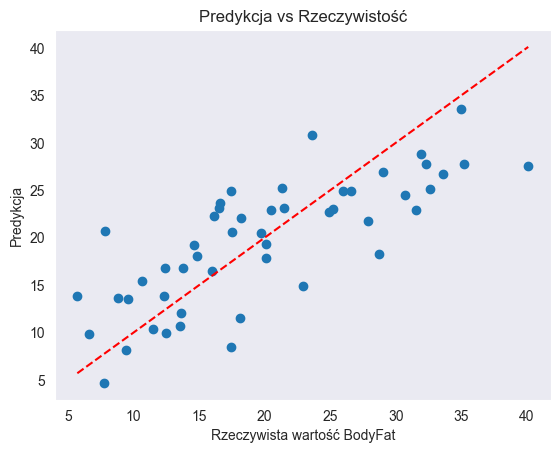

In [13]:
knn=KNN(5, X_train, y_train)
preds = [knn.classify(x) for _, x in X_test.iterrows()]
plt.scatter(y_test, preds)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Rzeczywista wartość BodyFat")
plt.ylabel("Predykcja")
plt.title("Predykcja vs Rzeczywistość")
plt.grid()
plt.show()

Dla danych z normalizacja

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
X_train_norm = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns=X_train.columns,
    index=X_train.index
)

X_test_norm = pd.DataFrame(
    scaler.transform(X_test),
    columns=X_test.columns,
    index=X_test.index
)

In [15]:
k,rmse=NumberOfNeighbors(X_train_norm, y_train, X_test_norm, y_test, 20)
print(f'Liczba sąsiadów dla której błąd jest najmniejszy: {k}. Błąd: {rmse:.3}')

k = 2: R2: 0.51, MAE: 4.74 RMSE: 6.04
k = 3: R2: 0.56, MAE: 4.52 RMSE: 5.75
k = 4: R2: 0.56, MAE: 4.53 RMSE: 5.75
k = 5: R2: 0.57, MAE: 4.68 RMSE: 5.69
k = 6: R2: 0.57, MAE: 4.68 RMSE: 5.64
k = 7: R2: 0.57, MAE: 4.72 RMSE: 5.68
k = 8: R2: 0.6, MAE: 4.59 RMSE: 5.48
k = 9: R2: 0.6, MAE: 4.65 RMSE: 5.44
k = 10: R2: 0.62, MAE: 4.49 RMSE: 5.3
k = 11: R2: 0.62, MAE: 4.46 RMSE: 5.36
k = 12: R2: 0.62, MAE: 4.49 RMSE: 5.36
k = 13: R2: 0.62, MAE: 4.41 RMSE: 5.36
k = 14: R2: 0.62, MAE: 4.43 RMSE: 5.36
k = 15: R2: 0.61, MAE: 4.45 RMSE: 5.39
k = 16: R2: 0.6, MAE: 4.49 RMSE: 5.47
k = 17: R2: 0.59, MAE: 4.52 RMSE: 5.52
k = 18: R2: 0.6, MAE: 4.48 RMSE: 5.47
k = 19: R2: 0.59, MAE: 4.51 RMSE: 5.51
Liczba sąsiadów dla której błąd jest najmniejszy: 10. Błąd: 0.624


Lepsze wyniki dla danych znormalizowanych

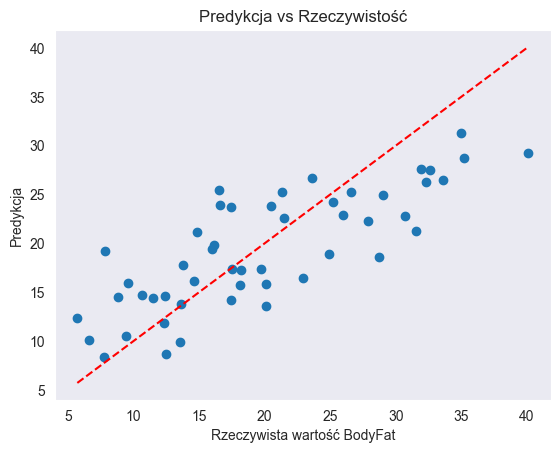

In [16]:
knn=KNN(10, X_train_norm, y_train)
preds = [knn.classify(x) for _, x in X_test_norm.iterrows()]
plt.scatter(y_test, preds)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Rzeczywista wartość BodyFat")
plt.ylabel("Predykcja")
plt.title("Predykcja vs Rzeczywistość")
plt.grid()
plt.show()

In [17]:
Dane_po_analizie = df.drop(columns=['Height','Age','Ankle','Wrist','Forearm'])
Dane_po_analizie

,BodyFat,Weight,Neck,Chest,Abdomen,Hip,Thigh,Knee,Biceps
0,12.3,154.25,36.2,93.1,85.2,94.5,59.0,37.3,32.0
1,6.1,173.25,38.5,93.6,83.0,98.7,58.7,37.3,30.5
2,25.3,154.00,34.0,95.8,87.9,99.2,59.6,38.9,28.8
3,10.4,184.75,37.4,101.8,86.4,101.2,60.1,37.3,32.4
4,28.7,184.25,34.4,97.3,100.0,101.9,63.2,42.2,32.2
...,...,...,...,...,...,...,...,...,...
247,11.0,134.25,34.9,89.2,83.6,88.8,49.6,34.8,25.6
248,33.6,201.00,40.9,108.5,105.0,104.5,59.6,40.8,35.2
249,29.3,186.75,38.9,111.1,111.5,101.7,60.3,37.3,31.3
250,26.0,190.75,38.9,108.3,101.3,97.8,56.0,41.6,30.5


In [18]:
X_train_2, y_train_2, X_test_2, y_test_2 = Test_Train_Split(Dane_po_analizie,test_ratio=0.25,last_column='BodyFat')
X_train_2_norm = pd.DataFrame(
    scaler.fit_transform(X_train_2),
    columns=X_train_2.columns,
    index=X_train_2.index
)

X_test_2_norm = pd.DataFrame(
    scaler.transform(X_test_2),
    columns=X_test_2.columns,
    index=X_test_2.index
)

In [19]:
k,rmse=NumberOfNeighbors(X_train_2_norm, y_train_2, X_test_2_norm, y_test_2, 20)
print(f'Liczba sąsiadów dla której błąd jest najmniejszy: {k}. Błąd: {rmse:.3}')

k = 2: R2: 0.63, MAE: 4.69 RMSE: 5.52
k = 3: R2: 0.67, MAE: 4.41 RMSE: 5.22
k = 4: R2: 0.67, MAE: 4.36 RMSE: 5.28
k = 5: R2: 0.66, MAE: 4.43 RMSE: 5.31
k = 6: R2: 0.65, MAE: 4.56 RMSE: 5.42
k = 7: R2: 0.65, MAE: 4.55 RMSE: 5.38
k = 8: R2: 0.64, MAE: 4.54 RMSE: 5.45
k = 9: R2: 0.61, MAE: 4.73 RMSE: 5.66
k = 10: R2: 0.61, MAE: 4.83 RMSE: 5.73
k = 11: R2: 0.6, MAE: 4.84 RMSE: 5.75
k = 12: R2: 0.61, MAE: 4.86 RMSE: 5.73
k = 13: R2: 0.6, MAE: 4.84 RMSE: 5.76
k = 14: R2: 0.6, MAE: 4.84 RMSE: 5.78
k = 15: R2: 0.61, MAE: 4.82 RMSE: 5.73
k = 16: R2: 0.61, MAE: 4.8 RMSE: 5.73
k = 17: R2: 0.61, MAE: 4.71 RMSE: 5.67
k = 18: R2: 0.61, MAE: 4.73 RMSE: 5.71
k = 19: R2: 0.59, MAE: 4.8 RMSE: 5.81
Liczba sąsiadów dla której błąd jest najmniejszy: 3. Błąd: 0.673


Accuracy: 33.3


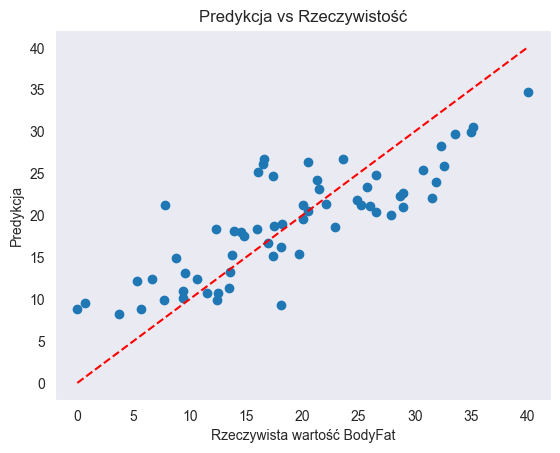

In [20]:
knn=KNN(4, X_train_2_norm, y_train_2)
preds = [knn.classify(x) for _, x in X_test_2_norm.iterrows()]


y_true = y_test_2.tolist()
with_in_2 = [abs(p - t) <= 4.83 / 2 for p, t in zip(preds, y_true)]
accuracy = sum(with_in_2) / len(with_in_2)
print(f"Accuracy: {accuracy*100:.3}")

plt.scatter(y_test_2, preds)
plt.plot([y_test_2.min(), y_test_2.max()], [y_test_2.min(), y_test_2.max()], 'r--')
plt.xlabel("Rzeczywista wartość BodyFat")
plt.ylabel("Predykcja")
plt.title("Predykcja vs Rzeczywistość")
plt.grid()
plt.show()

In [21]:
df['ThighHip'] = df['Thigh'] / df['Hip']
df['WHR'] = df['Abdomen'] / df['Hip']
df['WtoH'] = df['Weight'] / df['Height']

Dane_po_analizie = df.drop(columns=['Height','Age','Ankle','Wrist','Forearm'])
Dane_po_analizie

,BodyFat,Weight,Neck,Chest,Abdomen,Hip,Thigh,Knee,Biceps,ThighHip,WHR,WtoH
0,12.3,154.25,36.2,93.1,85.2,94.5,59.0,37.3,32.0,0.624339,0.901587,2.276753
1,6.1,173.25,38.5,93.6,83.0,98.7,58.7,37.3,30.5,0.594732,0.840932,2.397924
2,25.3,154.00,34.0,95.8,87.9,99.2,59.6,38.9,28.8,0.600806,0.886089,2.324528
3,10.4,184.75,37.4,101.8,86.4,101.2,60.1,37.3,32.4,0.593874,0.853755,2.557093
4,28.7,184.25,34.4,97.3,100.0,101.9,63.2,42.2,32.2,0.620216,0.981354,2.585965
...,...,...,...,...,...,...,...,...,...,...,...,...
247,11.0,134.25,34.9,89.2,83.6,88.8,49.6,34.8,25.6,0.558559,0.941441,2.003731
248,33.6,201.00,40.9,108.5,105.0,104.5,59.6,40.8,35.2,0.570335,1.004785,2.881720
249,29.3,186.75,38.9,111.1,111.5,101.7,60.3,37.3,31.3,0.592920,1.096362,2.829545
250,26.0,190.75,38.9,108.3,101.3,97.8,56.0,41.6,30.5,0.572597,1.035787,2.705674


In [22]:
Dane_po_analizie.drop(columns=['BodyFat']).corrwith(Dane_po_analizie['BodyFat'])

Weight      0.612414
Neck        0.490592
Chest       0.702620
Abdomen     0.813432
Hip         0.625201
Thigh       0.559608
Knee        0.508665
Biceps      0.493271
ThighHip    0.133856
WHR         0.774488
WtoH        0.609960
dtype: float64

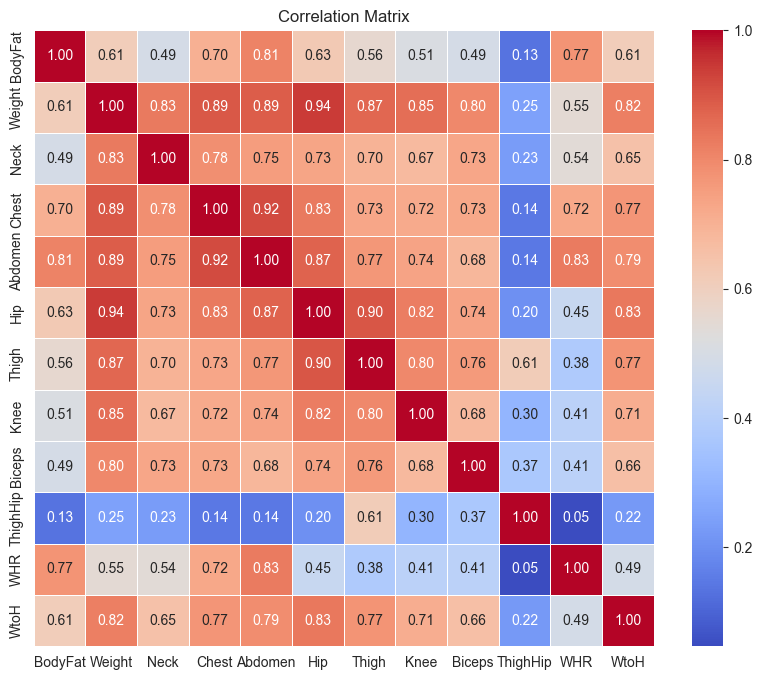

In [23]:
correlationMatrix = Dane_po_analizie.corr()
plt.figure(figsize=(10, 8))
plt.title("Correlation Matrix")
sns.heatmap(correlationMatrix, annot = True, cmap = 'coolwarm', linewidths=0.5, fmt = '.2f')
plt.show()

In [24]:
X_train_3, y_train_3, X_test_3, y_test_3 = Test_Train_Split(Dane_po_analizie,test_ratio=0.25,last_column='BodyFat')
X_train_3_norm = pd.DataFrame(
    scaler.fit_transform(X_train_3),
    columns=X_train_3.columns,
    index=X_train_3.index
)

X_test_3_norm = pd.DataFrame(
    scaler.transform(X_test_3),
    columns=X_test_3.columns,
    index=X_test_3.index
)

In [25]:
k,rmse=NumberOfNeighbors(X_train_3_norm, y_train_3, X_test_3_norm, y_test_3, 20)
print(f'Liczba sąsiadów dla której błąd jest najmniejszy: {k}. Błąd: {rmse:.3}')

k = 2: R2: 0.7, MAE: 4.15 RMSE: 5.01
k = 3: R2: 0.72, MAE: 4.07 RMSE: 4.81
k = 4: R2: 0.68, MAE: 4.43 RMSE: 5.16
k = 5: R2: 0.65, MAE: 4.68 RMSE: 5.43
k = 6: R2: 0.68, MAE: 4.41 RMSE: 5.16
k = 7: R2: 0.68, MAE: 4.47 RMSE: 5.18
k = 8: R2: 0.68, MAE: 4.37 RMSE: 5.15
k = 9: R2: 0.68, MAE: 4.37 RMSE: 5.14
k = 10: R2: 0.66, MAE: 4.51 RMSE: 5.3
k = 11: R2: 0.66, MAE: 4.6 RMSE: 5.34
k = 12: R2: 0.67, MAE: 4.55 RMSE: 5.25
k = 13: R2: 0.66, MAE: 4.63 RMSE: 5.33
k = 14: R2: 0.65, MAE: 4.72 RMSE: 5.42
k = 15: R2: 0.64, MAE: 4.78 RMSE: 5.48
k = 16: R2: 0.65, MAE: 4.73 RMSE: 5.42
k = 17: R2: 0.65, MAE: 4.75 RMSE: 5.41
k = 18: R2: 0.65, MAE: 4.73 RMSE: 5.41
k = 19: R2: 0.65, MAE: 4.73 RMSE: 5.43
Liczba sąsiadów dla której błąd jest najmniejszy: 3. Błąd: 0.723


In [26]:
knn_analiza = KNN(3, X_train_3_norm, y_train_3)

predictions = [knn_analiza.classify(X_test_3_norm.iloc[i]) for i in range(len(X_test_3_norm))]
mae = mean_absolute_error(y_test_3, predictions)
rmse = np.sqrt(mean_squared_error(y_test_3, predictions))
r2 = r2_score(y_test_3, predictions)

print(f"MAE: {mae:.3}")
print(f"RMSE: {rmse:.3}")
print(f"R2: {r2:.3}")

y_true = y_test_3.tolist()
with_in_1 = [abs(p - t) <= mae for p, t in zip(predictions, y_true)]
accuracy = sum(with_in_1) / len(with_in_1)
print(f"Accuracy: {accuracy*100:.3}")

MAE: 4.07
RMSE: 4.81
R2: 0.723
Accuracy: 54.0


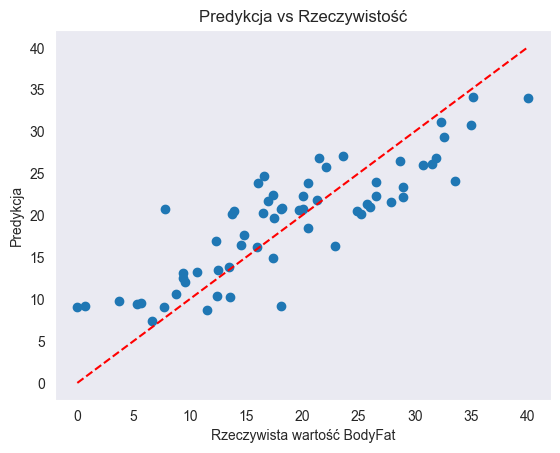

In [27]:
plt.scatter(y_test_3, predictions)
plt.plot([y_test_3.min(), y_test_3.max()], [y_test_3.min(), y_test_3.max()], 'r--')
plt.xlabel("Rzeczywista wartość BodyFat")
plt.ylabel("Predykcja")
plt.title("Predykcja vs Rzeczywistość")
plt.grid()
plt.show()

In [28]:
from sklearn.linear_model import LinearRegression
linear=LinearRegression()
linear.fit(X_train_3_norm, y_train_3)
predictions=linear.predict(X_test_3_norm)
mae = mean_absolute_error(y_test_3, predictions)
rmse = np.sqrt(mean_squared_error(y_test_3, predictions))
r2 = r2_score(y_test_3, predictions)
print(f"MAE: {mae:.3}")
print(f"RMSE: {rmse:.3}")
print(f"R2: {r2:.3}")

MAE: 3.44
RMSE: 4.28
R2: 0.78


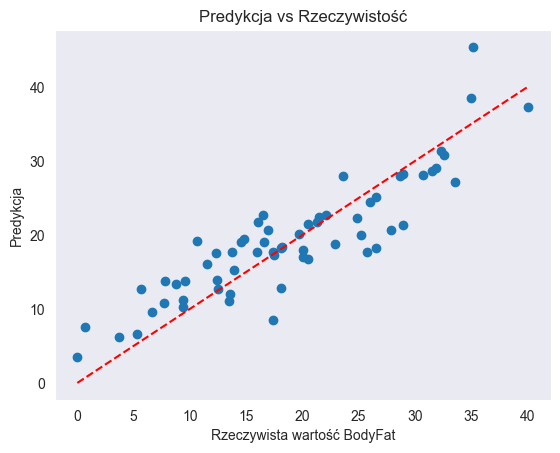

In [29]:
plt.scatter(y_test_2, predictions)
plt.plot([y_test_2.min(), y_test_2.max()], [y_test_2.min(), y_test_2.max()], 'r--')
plt.xlabel("Rzeczywista wartość BodyFat")
plt.ylabel("Predykcja")
plt.title("Predykcja vs Rzeczywistość")
plt.grid()
plt.show()

TESTY: USUNIĘCIE ODSTAJĄCYCH DANYCH

In [30]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
y_pred = lof.fit_predict(X_train_2_norm)

X_train_2_norm['LOF'] = y_pred
X_clean = X_train_2_norm[X_train_2_norm['LOF'] == 1].drop(columns=['LOF'])
y_clean = y_train_2[X_train_2_norm['LOF'] == 1]
X_train_2_norm.drop(columns=['LOF'], inplace=True)
X_train_2_norm.describe()



,Weight,Neck,Chest,Abdomen,Hip,Thigh,Knee,Biceps
count,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000
mean,0.377248,0.538153,0.381094,0.394654,0.362401,0.408672,0.408541,0.492965
std,0.193515,0.175160,0.176588,0.178942,0.157446,0.193890,0.176469,0.210671
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.238447,0.414062,0.236080,0.267025,0.255583,0.278884,0.293651,0.340741
50%,0.358595,0.531250,0.360802,0.369176,0.347395,0.390438,0.396825,0.474074
75%,0.512015,0.648438,0.478842,0.514337,0.444169,0.533865,0.507937,0.651852
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
linear.fit(X_clean, y_clean)
predictions=linear.predict(X_test_2_norm)
mae = mean_absolute_error(y_test_2, predictions)
rmse = np.sqrt(mean_squared_error(y_test_2, predictions))
r2 = r2_score(y_test_2, predictions)
print(f"MAE: {mae:.3}")
print(f"RMSE: {rmse:.3}")
print(f"R2: {r2:.3}")

MAE: 3.54
RMSE: 4.39
R2: 0.769


In [32]:
k,rmse=NumberOfNeighbors(X_clean, y_clean, X_test_2_norm, y_test_2, 20)
print(f'Liczba sąsiadów dla której błąd jest najmniejszy: {k}. Błąd: {rmse:.3}')

k = 2: R2: 0.59, MAE: 4.98 RMSE: 5.86
k = 3: R2: 0.61, MAE: 4.73 RMSE: 5.72
k = 4: R2: 0.61, MAE: 4.6 RMSE: 5.73
k = 5: R2: 0.62, MAE: 4.56 RMSE: 5.62
k = 6: R2: 0.62, MAE: 4.68 RMSE: 5.66
k = 7: R2: 0.61, MAE: 4.67 RMSE: 5.7
k = 8: R2: 0.6, MAE: 4.67 RMSE: 5.77
k = 9: R2: 0.59, MAE: 4.83 RMSE: 5.88
k = 10: R2: 0.58, MAE: 4.91 RMSE: 5.91
k = 11: R2: 0.58, MAE: 4.89 RMSE: 5.89
k = 12: R2: 0.58, MAE: 4.93 RMSE: 5.89
k = 13: R2: 0.58, MAE: 4.9 RMSE: 5.89
k = 14: R2: 0.58, MAE: 4.9 RMSE: 5.89
k = 15: R2: 0.58, MAE: 4.93 RMSE: 5.89
k = 16: R2: 0.59, MAE: 4.86 RMSE: 5.86
k = 17: R2: 0.59, MAE: 4.85 RMSE: 5.85
k = 18: R2: 0.58, MAE: 4.89 RMSE: 5.93
k = 19: R2: 0.56, MAE: 4.95 RMSE: 6.04
Liczba sąsiadów dla której błąd jest najmniejszy: 5. Błąd: 0.62


Usuwanie skrajnych wartości nic nie dało
